In [161]:
# Importing Libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [163]:
# load dataset 
data = pd.read_csv(r"C:\Users\revan\Downloads\Stock Prices Data Set.csv")

In [118]:
# Display basic info
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


None

In [120]:
# Display first few rows
display(data.head())

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [122]:
# Check for missing values
missing_values = data.isnull().sum()
display(missing_values[missing_values > 0])

open    11
high     8
low      8
dtype: int64

In [124]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [126]:
# Summary statistics
display(data.describe())

,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [128]:
# Check unique values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}: {data[col].nunique()}")

Unique values in symbol: 505
Unique values in date: 1007


In [142]:
# Time-series visualization (if applicable)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

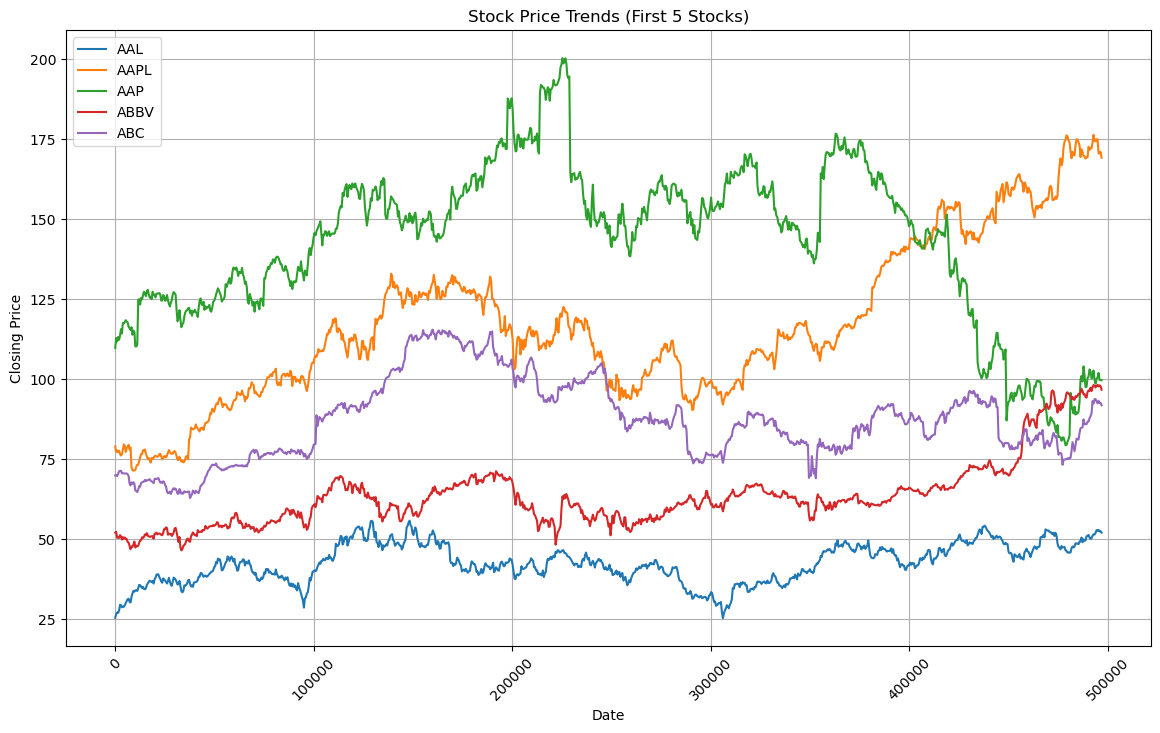

In [152]:
# Line plot for stock trends
plt.figure(figsize=(14, 8))
for stock in data['symbol'].unique()[:5]:  # Plot first 5 stocks for clarity
    stock_data = data[data['symbol'] == stock]
    plt.plot(stock_data.index, stock_data['close'], label=stock)

plt.legend()
plt.title("Stock Price Trends (First 5 Stocks)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [73]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [99]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL of the website
base_url = "https://books.toscrape.com/"

# Function to scrape data from a single page
def scrape_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    
    books = []
    for book in soup.find_all("article", class_="product_pod"):
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text
        rating = book.p["class"][1]  # Extract the rating (e.g., "Three")
        books.append({
            "Title": title,
            "Price": price,
            "Rating": rating
        })
    return books

# Function to handle pagination
def scrape_all_pages(base_url):
    all_books = []
    page_number = 1
    
    while True:
        url = f"{base_url}catalogue/page-{page_number}.html"
        print(f"Scraping {url}...")
        response = requests.get(url)
        
        # Stop if the page does not exist (404 error)
        if response.status_code != 200:
            break
        
        books = scrape_page(url)
        all_books.extend(books)
        page_number += 1
    
    return all_books

# Scrape all pages
all_books = scrape_all_pages(base_url)

# Convert the data to a DataFrame
data = pd.DataFrame(all_books)

# Save the data to a CSV file
data.to_csv("books_data.csv", index=False)

print("Scraping completed. Data saved to books_data.csv.")

Scraping https://books.toscrape.com/catalogue/page-1.html...
Scraping https://books.toscrape.com/catalogue/page-2.html...
Scraping https://books.toscrape.com/catalogue/page-3.html...
Scraping https://books.toscrape.com/catalogue/page-4.html...
Scraping https://books.toscrape.com/catalogue/page-5.html...
Scraping https://books.toscrape.com/catalogue/page-6.html...
Scraping https://books.toscrape.com/catalogue/page-7.html...
Scraping https://books.toscrape.com/catalogue/page-8.html...
Scraping https://books.toscrape.com/catalogue/page-9.html...
Scraping https://books.toscrape.com/catalogue/page-10.html...
Scraping https://books.toscrape.com/catalogue/page-11.html...
Scraping https://books.toscrape.com/catalogue/page-12.html...
Scraping https://books.toscrape.com/catalogue/page-13.html...
Scraping https://books.toscrape.com/catalogue/page-14.html...
Scraping https://books.toscrape.com/catalogue/page-15.html...
Scraping https://books.toscrape.com/catalogue/page-16.html...
Scraping https://